In [42]:
import numpy as np
# wipi = McMtPi
Pi = [[0,3,50],
    [2,-5,47], 
    [-1,7,60], 
    [5,-1,40], 
    [0,2,45], 
    [3,-4,44]] 
Pi = np.array(Pi)
Pi2 = np.float32(Pi[:, np.newaxis, :])

gi = [[0,3,30],
    [-3,-5,28],
    [10,7,31],
    [-10,1,25],
    [-5,2,30],
    [-6,-4,27]]
gi = np.array(gi)
Mc = np.identity(6)
# Mc1 = np.dot(Mc, Pi)
Mc1 = np.matmul(Mc, Pi)
# print(Mc1)
# Mc1
Mtt = np.matmul(gi, np.linalg.pinv(Mc1))
Mt = Mtt[:3,:4]
# print(Mc)

print('Matrix Mt is: ',Mt)#[0:3,:])

pi = np.matmul(Mtt, Pi)
pi2 = np.float32(pi[:, np.newaxis, :])

Matrix Mt is:  [[ 0.15835648 -0.06458184  0.28088118  0.0954863 ]
 [ 0.16594055  1.02653795 -0.1241919  -1.23614761]
 [-0.11476644 -1.51587742  0.36394812  2.79533111]]


In [33]:
k = 1
def cal_normal_random(mean,sigma):
    max_ = 2147483647
    rand_num= []
    for i in range (0,12):
        rand_num.append(np.random.randn()/(max_))
    c1 = 0.029899776 ;
    c2 = 0.008355968 ;
    c3 = 0.076542912 ;
    c4 = 0.252408784 ;
    c5 = 3.949846138 ;

    r = 0.0 ;
    for i in range(0,12):
        r += rand_num[i] ;
        r = (r-6.0)/4.0 ;
        r2 = r*r ;
    gauss_rand=((((c1*r2+c2)*r2+c3)*r2+c4)*r2 +c5)*r ;
    return(mean+sigma*gauss_rand)

cal_normal_random(mean = 0 ,sigma = 1)


-28.746574730127787

In [97]:
m = cal_normal_random(mean = 0 ,sigma = 1)

# gi'
gi = [[0,3,30],
    [-3,-5,28],
    [10,7,31],
    [-10,1,25],
    [-5,2,30],
    [-6,-4,27]]
for i in range(6):
    for j in range(3):
         gi[i][j] += int(1 % m)
#gi` = gi1
gi1 = np.array(gi)
#pi` = piz
piz = pi.T
print(gi)

[[-27, -24, 3], [-30, -32, 1], [-17, -20, 4], [-37, -26, -2], [-32, -25, 3], [-33, -31, 0]]


In [45]:
#Mi' = Min
Min = np.matmul(piz, Pi)
Min

array([[ -84.,  109., -430.],
       [ -24.,  102.,  289.],
       [ 231.,   94., 8214.]])

In [46]:
#Pi' = Piz
Piz = np.matmul(gi1, np.linalg.pinv(Min))
Piz

array([[ 1.0024618 , -1.40066714,  0.10212459],
       [ 1.16156982, -1.66515306,  0.11951598],
       [ 0.67881305, -0.98666595,  0.07073729],
       [ 1.30375571, -1.76813541,  0.13021744],
       [ 1.15539521, -1.58733041,  0.11669813],
       [ 1.23745806, -1.74250234,  0.1260884 ]])

In [47]:
import cv2

objectPoints = np.random.random((10,3,1))

imagePoints = np.random.random((10,2,1))

cameraMatrix = np.eye(3)

distCoeffs = np.zeros((5,1))

print(cv2.solvePnP(objectPoints, imagePoints, cameraMatrix, distCoeffs)[1])



[[0.71379962]
 [0.08696483]
 [0.91170459]]


In [89]:
# mtx = np.float32(Mc[:, np.newaxis, :])
# dist = np.float32(gi[:, np.newaxis, :])

# rvec, tvec, inliers = cv2.solvePnPRansac(Pi2, pi2, mtx, dist)
# print( "Rvec\n", rvec)
# print( "\nTvec", tvec)


# dst, jacobian = cv2.Rodrigues(rvec)
# x = tvec[0][0]
# y = tvec[2][0]
# t = (math.asin(-dst[0][2]))

# print( "X", x, "Y", y, "Angle", t)
# print ("90-t", (math.pi/2) - t)

# Rx = y * (math.cos((math.pi/2) - t))
# Ry = y * (math.sin((math.pi/2) - t))

# print( "rx", Rx, "ry", Ry)

# cv2.solvePnP(Pi2, pi2, mtx, dist, useExtrinsicGuess=0)
Pi = [[0,3,50],
    [2,-5,47], 
    [-1,7,60], 
    [5,-1,40], 
    [0,2,45], 
    [3,-4,44]]
v1 = []
for i  in Pi:
    for j in i:
        v1.append(j) 
        
v2 = []
for i  in Piz:
    for j in i:
        v2.append(j) 
# v = [i for i in list(Pi)]
# v1
v3 = []
for n in range(8):
        j = (1/ 10) * (v1[n] - v2[n])**2
        v3.append(j)
        
v4 = np.exp(sorted(v3))
       

In [98]:
v3 

[0.10049296659462287,
 1.9365871244689754,
 248.97979704888226,
 0.07029651679307881,
 1.1121204095187693,
 219.77797819757868,
 0.28184132500784453,
 6.37868330370686]

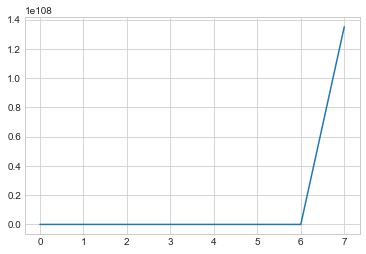

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

ax.plot(v4)


In [70]:
distCoeffs = np.zeros((5,1))
cv2.solvePnP(Pi, pi, Mc, distCoeffs)

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:92: error: (-215:Assertion failed) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, CV_32F), ipoints.checkVector(2, CV_64F)) in function 'cv::solvePnP'
